In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pint
import scipy.linalg
import seaborn as sns
import pandas as pd
import tabulate

from funkcje import *

from scipy.linalg import eigh

In [2]:
s_loc = pd.read_csv('S_loc_N2_L100.dat.txt', sep=r'\s+', header=None)
s_loc.columns = ['i', 'j', 'value']
s_loc = s_loc.pivot(index='i', columns='j', values='value')
s_loc = np.array(s_loc)

t_loc = pd.read_csv('T_loc_N2_L100.dat.txt', sep=r'\s+', header=None)
t_loc.columns = ['i', 'j', 'value']
t_loc = t_loc.pivot(index='i', columns='j', values='value')
t_loc = np.array(t_loc)

v_loc = pd.read_csv('V_loc_N2_L100_element_11.dat.txt', sep=r'\s+', header=None)
v_loc.columns = ['i', 'j', 'value']
v_loc = v_loc.pivot(index='i', columns='j', values='value')
v_loc = np.array(v_loc)

# print(tabulate.tabulate(s_loc, tablefmt="github", floatfmt=".3f"))

In [3]:
print('--- Lokalna macierz przekrywania ---\n')
# print(tabulate.tabulate(calcLocalOverlapMatrix(aa**2/4).magnitude, tablefmt="github", floatfmt=".3f"))

print('\n--- Odniesienie ---\n')
print(tabulate.tabulate(s_loc, tablefmt="github", floatfmt=".3f"))

--- Lokalna macierz przekrywania ---


--- Odniesienie ---

|----------|----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| 3967.509 | -991.877 | -991.877 |  247.969 |  1983.754 |  -495.938 |  1983.754 |  -495.938 |   991.877 |
| -991.877 | 3967.509 |  247.969 | -991.877 |  1983.754 |  1983.754 |  -495.938 |  -495.938 |   991.877 |
| -991.877 |  247.969 | 3967.509 | -991.877 |  -495.938 |  -495.938 |  1983.754 |  1983.754 |   991.877 |
|  247.969 | -991.877 | -991.877 | 3967.509 |  -495.938 |  1983.754 |  -495.938 |  1983.754 |   991.877 |
| 1983.754 | 1983.754 | -495.938 | -495.938 | 15870.034 |   991.877 |   991.877 | -3967.507 |  7935.014 |
| -495.938 | 1983.754 | -495.938 | 1983.754 |   991.877 | 15870.034 | -3967.507 |   991.877 |  7935.014 |
| 1983.754 | -495.938 | 1983.754 | -495.938 |   991.877 | -3967.507 | 15870.034 |   991.877 |  7935.014 |
| -495.938 | -495.938 | 1983.754 | 1983.754 | -3967.507 |   991.877 |   991.877 | 15870.034 

In [4]:
print('--- Lokalna macierz energii kinetycznej ---\n')
print(tabulate.tabulate(calcKineticEnergyMatrix().magnitude, tablefmt="github", floatfmt=".3f"))


print('\n--- Odniesienie ---\n')
print(tabulate.tabulate(t_loc, tablefmt="github", floatfmt=".3f"))
# calcLocalOverlapMatrix()[0][0]

--- Lokalna macierz energii kinetycznej ---

|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|  4.643 | -0.249 | -0.249 | -0.166 | -1.493 |  0.829 | -1.493 |  0.829 | -2.653 |
| -0.249 |  4.643 | -0.166 | -0.249 | -1.493 | -1.493 |  0.829 |  0.829 | -2.653 |
| -0.249 | -0.166 |  4.643 | -0.249 |  0.829 |  0.829 | -1.493 | -1.493 | -2.653 |
| -0.166 | -0.249 | -0.249 |  4.643 |  0.829 | -1.493 |  0.829 | -1.493 | -2.653 |
| -1.493 | -1.493 |  0.829 |  0.829 | 14.594 | -2.653 | -2.653 | -0.000 | -7.960 |
|  0.829 | -1.493 |  0.829 | -1.493 | -2.653 | 14.594 | -0.000 | -2.653 | -7.960 |
| -1.493 |  0.829 | -1.493 |  0.829 | -2.653 | -0.000 | 14.594 | -2.653 | -7.960 |
|  0.829 |  0.829 | -1.493 | -1.493 | -0.000 | -2.653 | -2.653 | 14.594 | -7.960 |
| -2.653 | -2.653 | -2.653 | -2.653 | -7.960 | -7.960 | -7.960 | -7.960 | 42.454 |

--- Odniesienie ---

|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|  4.643 | -0.249 | 

In [5]:
# potEnMatrix = buildPotentialEnergyMatrix()
# potEnMatrix = calcLocalPotentialEnergyMatrix(10, 100, aa**2/4*m*omega**2/2)
# print(tabulate.tabulate(calcKineticEnergyMatrix().magnitude, tablefmt="github", floatfmt=".5f"))
# calcX(1, 1, 10) * 0.05292

In [6]:
print("--- Macierz energii potencjalnej dla elementu k = 11 ---\n")
# print(tabulate.tabulate((potEnMatrix).magnitude, tablefmt="github", floatfmt=".3f"))

print('\n--- Odniesienie ---\n')
print(tabulate.tabulate(v_loc, tablefmt="github", floatfmt=".3f"))

--- Macierz energii potencjalnej dla elementu k = 11 ---


--- Odniesienie ---

|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|  0.286 | -0.393 | -0.393 |  0.179 | -0.215 | -0.107 | -0.215 | -0.107 | -0.286 |
| -0.393 |  3.291 |  0.179 | -1.145 |  1.788 |  1.288 | -0.107 | -0.608 |  0.715 |
| -0.393 |  0.179 |  3.291 | -1.145 | -0.107 | -0.608 |  1.788 |  1.288 |  0.715 |
|  0.179 | -1.145 | -1.145 |  6.295 | -0.608 |  3.291 | -0.608 |  3.291 |  1.717 |
| -0.215 |  1.788 | -0.107 | -0.608 |  5.150 |  0.715 | -0.286 | -2.575 |  1.145 |
| -0.107 |  1.288 | -0.608 |  3.291 |  0.715 | 17.168 | -2.575 |  1.717 |  9.156 |
| -0.215 | -0.107 |  1.788 | -0.608 | -0.286 | -2.575 |  5.150 |  0.715 |  1.145 |
| -0.107 | -0.608 |  1.288 |  3.291 | -2.575 |  1.717 |  0.715 | 17.168 |  9.156 |
| -0.286 |  0.715 |  0.715 |  1.717 |  1.145 |  9.156 |  1.145 |  9.156 | 36.625 |


In [8]:
boxLengths = np.linspace(10, 200, 22)
energyValues = {i: [] for i in [2, 4, 6]}
N = [2, 4, 6]
for n in N:
    progress = 0
    print(n)
    for L in boxLengths:
        update_progress(progress, len(boxLengths) - 1)
        S, H = buildGlobalMatrices(n, L)
        makeBoundCondsForGlobalMatrices(S, H)
        eigenvalues, eigenvectors = eigh(H, S)
        E = eigenvalues
        c = eigenvectors
        energyValues[n].append(E[E > 0])
        progress += 1

6
[██████████████████████████████] 100.00%

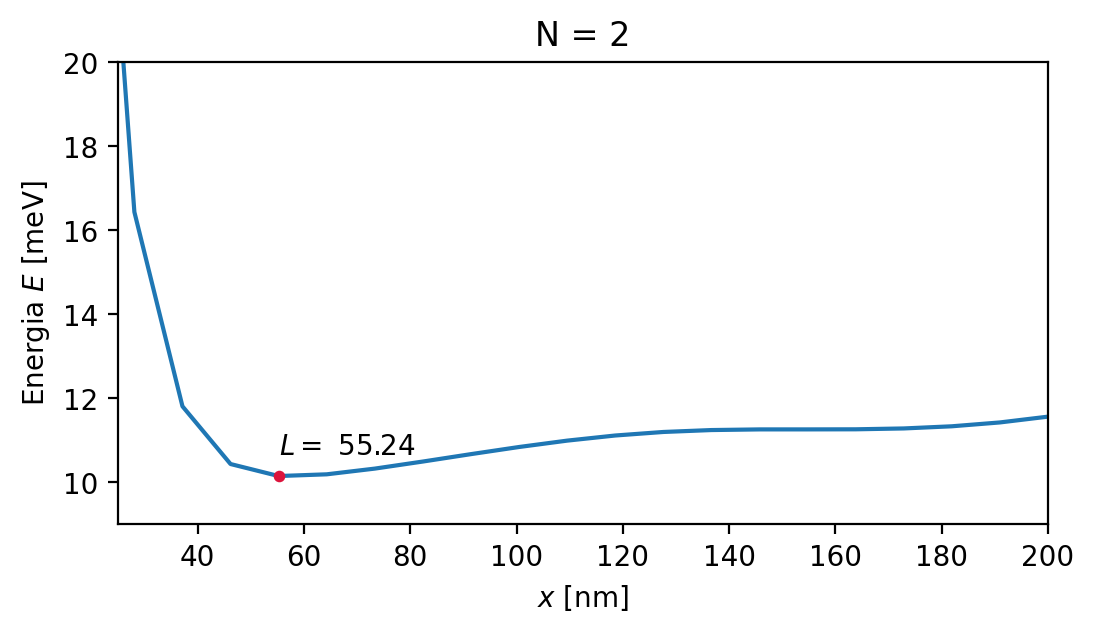

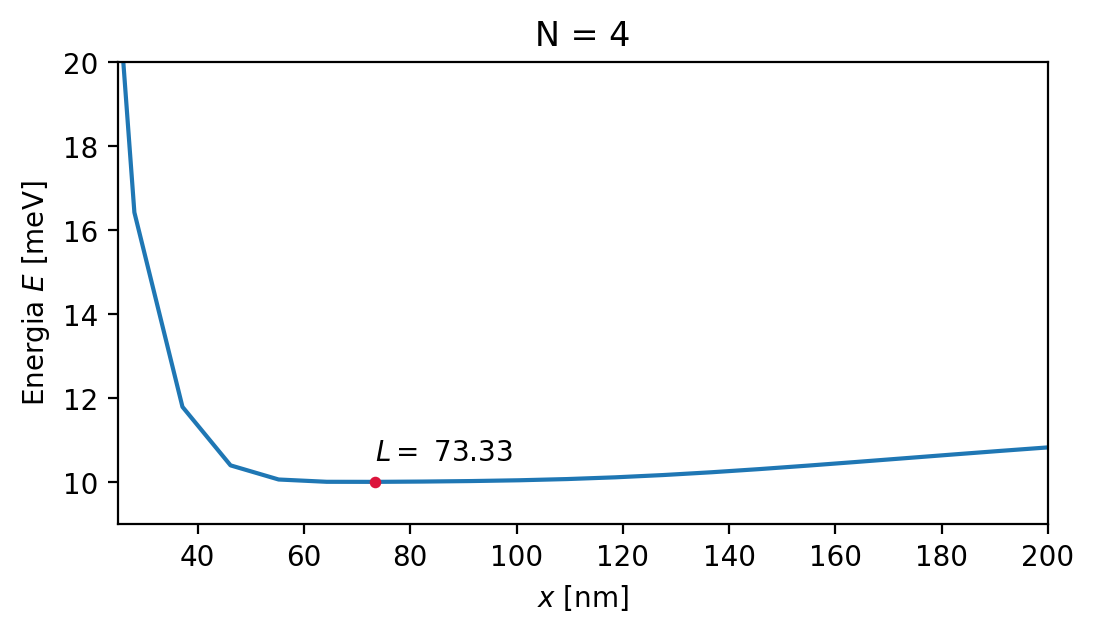

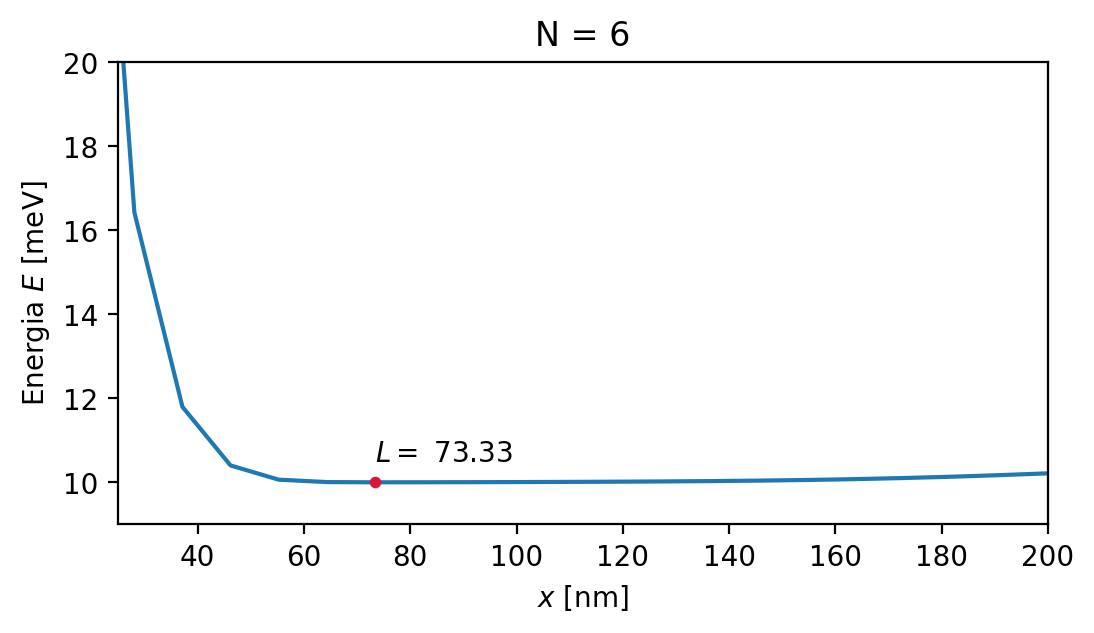

In [52]:
for n in [2, 4, 6]:
    plt.figure(dpi=200, figsize=(6, 3))
    e = np.array(energyValues[n])[:, 0] * 27211.6
    plt.plot(boxLengths, e)
    idx = np.argmin(e)
    plt.scatter(boxLengths[idx], e[idx], color='crimson', s=10, zorder=2)
    plt.text(boxLengths[idx], e[idx]*1.05, s=f'$L =$ {boxLengths[idx]:.2f}')
    plt.title(f"N = {n}")
    plt.xlabel("$x$ [nm]")
    plt.ylabel("Energia $E$ [meV]")
    plt.ylim(9, 20)
    plt.xlim(25, 200)

<Axes: >

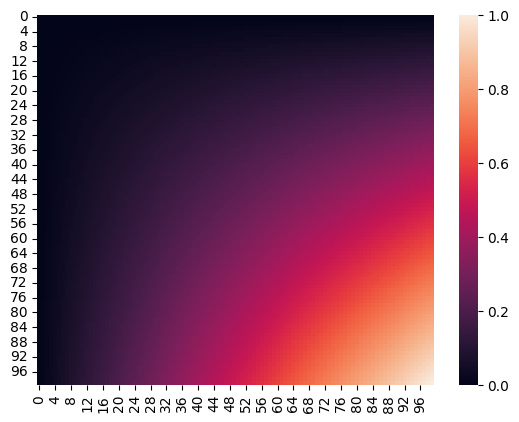

In [ ]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = g4(x[:, None], y[None, :])

sns.heatmap(z)



0, 1
0, 2
0, 5
0, 6
0, 26
0, 27
0, 28
0, 29
0, 30
1, 2
1, 3
1, 6
1, 7
1, 31
1, 32
1, 27
1, 33
1, 34
2, 3
2, 4
2, 7
2, 8
2, 35
2, 36
2, 32
2, 37
2, 38
3, 4
3, 17
3, 8
3, 18
3, 39
3, 40
3, 36
3, 41
3, 42
4, 5
4, 6
4, 9
4, 10
4, 29
4, 43
4, 44
4, 45
4, 46
5, 6
5, 7
5, 10
5, 11
5, 33
5, 47
5, 43
5, 48
5, 49
6, 7
6, 8
6, 11
6, 12
6, 37
6, 50
6, 47
6, 51
6, 52
7, 8
7, 18
7, 12
7, 19
7, 41
7, 53
7, 50
7, 54
7, 55
8, 9
8, 10
8, 13
8, 14
8, 45
8, 56
8, 57
8, 58
8, 59
9, 10
9, 11
9, 14
9, 15
9, 48
9, 60
9, 56
9, 61
9, 62
10, 11
10, 12
10, 15
10, 16
10, 51
10, 63
10, 60
10, 64
10, 65
11, 12
11, 19
11, 16
11, 20
11, 54
11, 66
11, 63
11, 67
11, 68
12, 13
12, 14
12, 21
12, 22
12, 58
12, 69
12, 70
12, 71
12, 72
13, 14
13, 15
13, 22
13, 23
13, 61
13, 73
13, 69
13, 74
13, 75
14, 15
14, 16
14, 23
14, 24
14, 64
14, 76
14, 73
14, 77
14, 78
15, 16
15, 20
15, 24
15, 25
15, 67
15, 79
15, 76
15, 80
15, 81
